In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from CHAMP.CHAMP_Layer import CHAMP_Layer
from CHAMP.DataLoader import LoadData
from CHAMP.DataTools import LocalContrastNormalization, FilterInputData, GenerateMask
from CHAMP.Monitor import DisplayDico, DisplayConvergenceCHAMP, DisplayWhere
# inform on the location of your dataset
datapath = "../../../Science/These/Rapport d'avancement/database/"
import os
home = os.getenv('HOME')
datapath = os.path.join(home, "science/VB_These/Rapport d'avancement/database")

## Loading the Face DataBase

In [2]:
path = os.path.join(datapath, "Face_DataBase")

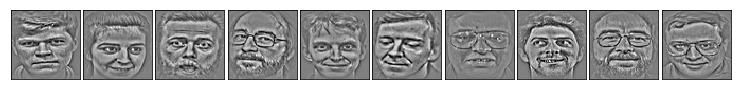

In [3]:
TrSet, TeSet = LoadData('Face', path, decorrelate=False, resize=(65, 65))
N_TrSet, _, _, _ = LocalContrastNormalization(TrSet)
Filtered_L_TrSet = FilterInputData(
    N_TrSet, sigma=0.25, style='Custom', start_R=15)
to_display = Filtered_L_TrSet[0][0, 0:10, :, :, :]
DisplayDico(to_display)

## Training the ConvMP_Layer

In [4]:
# MP Parameters
nb_dico = 20
dico_size = (13, 13)
l0 = 20
seed = 30
# Learning Parameters
eta = .007
nb_epoch = 500

In [5]:
L1 = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico,
                 dico_size=dico_size, verbose=2)
dico = L1.TrainLayer(Filtered_L_TrSet, eta=eta, nb_epoch=nb_epoch, seed=seed)

epoch 1 - 250 done in 8m19s
epoch 250 - 500 done in 8m10s


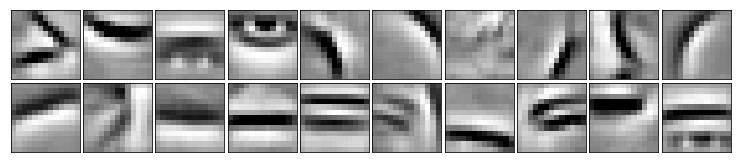

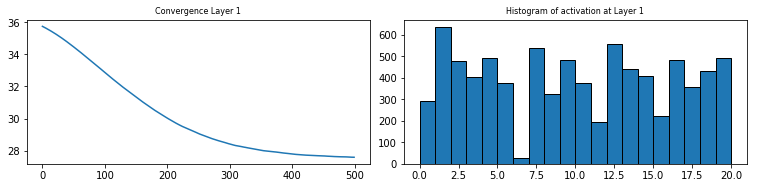

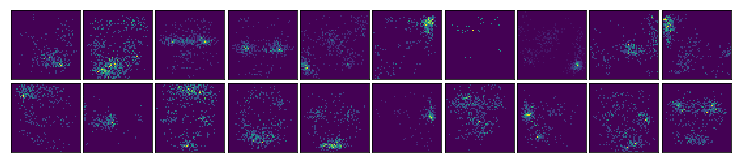

In [6]:
DisplayDico(L1.dictionary)
DisplayConvergenceCHAMP(L1, to_display=['error', 'histo'])
DisplayWhere(L1.where)

## Training the ConvMP Layer with mask for the filters

In [7]:
# MP Parameters
nb_dico = 20
width = 13
dico_size = (width, width)
l0 = 20
seed = 30

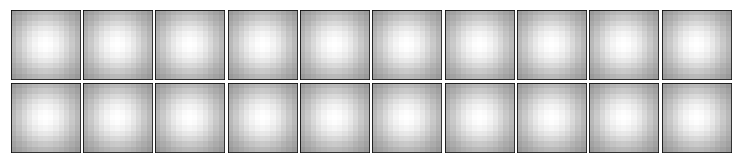

In [8]:
mask = GenerateMask(full_size=(nb_dico, 1, width, width), sigma=0.8, style='Gaussian')
DisplayDico(mask)

In [9]:
L1_mask = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico,
                      dico_size=dico_size, mask=mask, verbose=2)
dico_mask = L1_mask.TrainLayer(
    Filtered_L_TrSet, eta=eta, nb_epoch=nb_epoch, seed=seed)

epoch 1 - 250 done in 8m7s
epoch 250 - 500 done in 8m11s


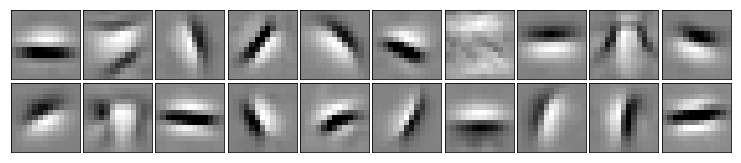

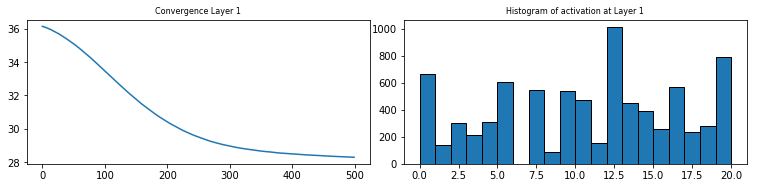

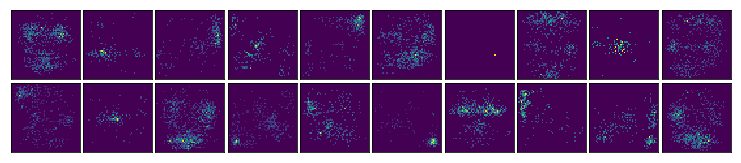

In [10]:
DisplayDico(L1_mask.dictionary)
DisplayConvergenceCHAMP(L1_mask, to_display=['error', 'histo'])
DisplayWhere(L1_mask.where)

## Training the ConvMP Layer with homeostasis

In [11]:
# Learning Parameters
eta_homeo = 0.05

In [12]:
L1_mask = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico,
                      dico_size=dico_size, mask=mask, verbose=2)
dico_mask = L1_mask.TrainLayer(
    Filtered_L_TrSet, eta=eta, eta_homeo=eta_homeo, nb_epoch=nb_epoch, seed=seed)

epoch 1 - 250 done in 10m41s
epoch 250 - 500 done in 10m34s


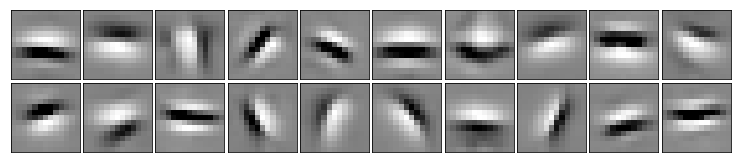

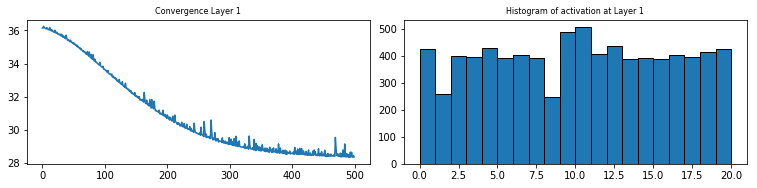

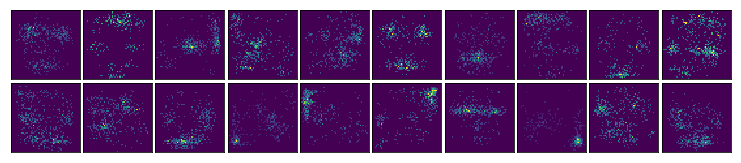

In [13]:
DisplayDico(L1_mask.dictionary)
DisplayConvergenceCHAMP(L1_mask, to_display=['error', 'histo'])
DisplayWhere(L1_mask.where)